Name - Timothy Yap

Student ID - 21611367

## Code for Exercise 2)
### Code for 2) a)

Condition number for n < 10:
 [1.0000000e+00 1.0000000e+00 3.2255000e+00 8.0116000e+00 2.3530900e+01
 6.3827300e+01 1.8981410e+02 5.3535310e+02 1.6054437e+03 4.6264499e+03]
Condition number increases exponentially for larger values of n (See graph). 
Thus when x has a large size, Vandermonde is ill-conditioned and is difficult to calculate invertible matrix.


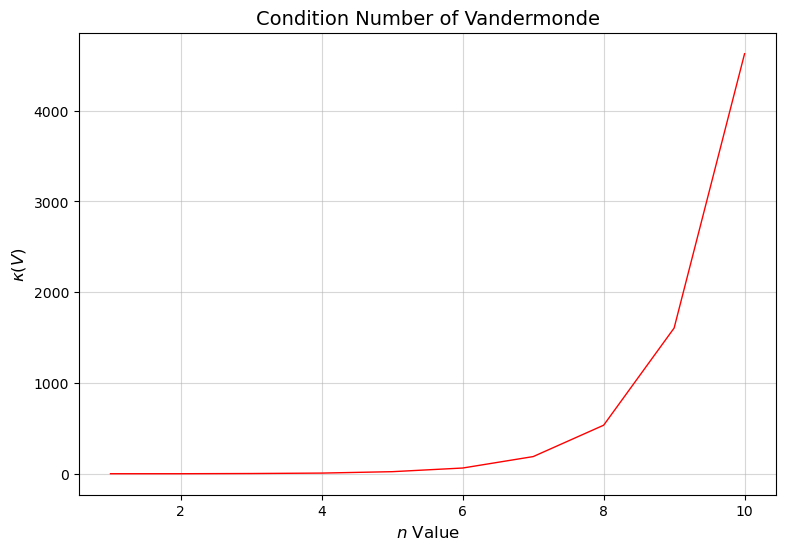

For n > 10 values, the condition number is very ill conditioned (> 10^20). 
Especially values beyond 40 (practically infinite) so it is akin beng singular.


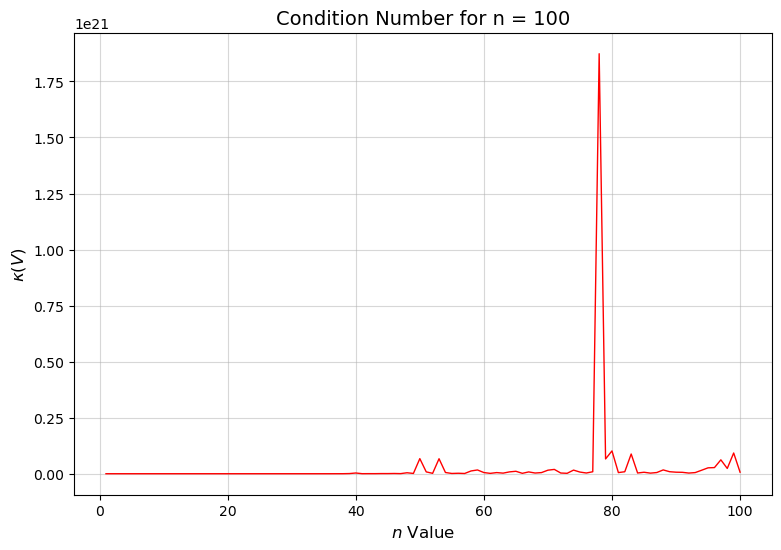

In [1]:
# Libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

# 2) a)

# Vandermonde Function
def Vandermonde(x, d):
    n = x.size
    m = d + 1
    vanMon = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            vanMon[i, j] = np.power(x[i], j)
    return vanMon

# Equidistant points in [-1, 1]
xPlot = np.arange(1,101)
yPlot = []
for i in xPlot:
    xArr = np.linspace(-1, 1, i)
    xVan = Vandermonde(xArr, i - 1)
    yPlot.append(np.linalg.cond(xVan))


print("Condition number for n < 10:\n", np.round(yPlot[0:10], 4))
print("Condition number increases exponentially for larger values of n (See graph). \nThus when x has a large size, Vandermonde is ill-conditioned and is difficult to calculate invertible matrix.")

# Plotting graph for n < 10
plt.figure(figsize=(9, 6))
plt.plot(xPlot[0:10], np.asarray(yPlot)[0:10], "r-", lw = 1)

# Graph settings
plt.title("Condition Number of Vandermonde", fontsize = 14)
plt.xlabel("$n$ Value", fontsize = 12)
plt.ylabel("$\kappa(V)$", fontsize = 12)
plt.grid(True, alpha = 0.5)
plt.show()  


print("For n > 10 values, the condition number is very ill conditioned (> 10^20). \nEspecially values beyond 40 (practically infinite) so it is akin beng singular.")
# Plotting graph for n = 100
plt.figure(figsize=(9, 6))
plt.plot(xPlot, yPlot, "r-", lw = 1)

# Graph settings
plt.title("Condition Number for n = 100", fontsize = 14)
plt.xlabel("$n$ Value", fontsize = 12)
plt.ylabel("$\kappa(V)$", fontsize = 12)
plt.grid(True, alpha = 0.5)
plt.show()  

### Question 2) b)
In attached pdf
### Question 2) c) Machine Learning
#### Part i) to iv)

Part i)


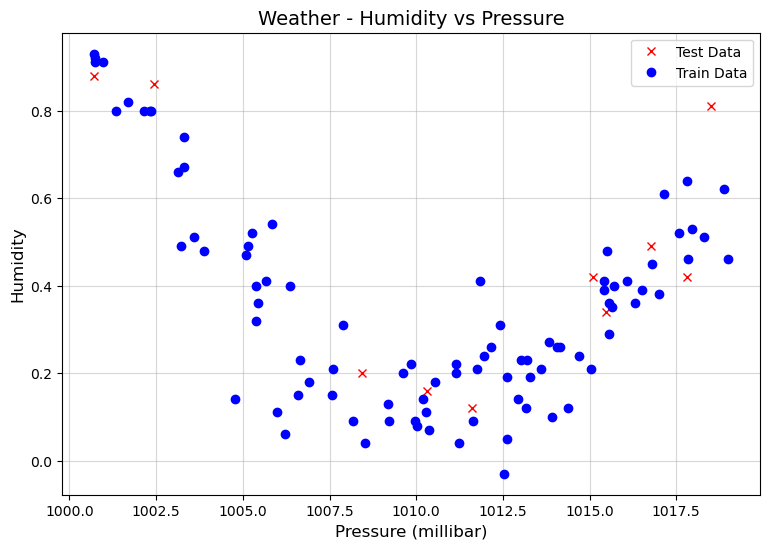

Part ii)
Coefficients of x for d = 0 is [0.35466667]
Coefficients of x for d = 1 is [ 1.77927556e+01 -1.72620923e-02]
Coefficients of x for d = 2 is [ 8.11000154e+03 -1.60465927e+01  7.93765447e-03]
Coefficients of x for d = 3 is [ 2.39032356e-02  8.04535032e+00 -1.59182348e-02  7.87392032e-06]
Coefficients of x for d = 4 is [ 4.69668495e-08  2.37122759e-05  7.98120484e-03 -1.57908158e-05
  7.81064336e-09]
Coefficients of x for d = 5 is [ 7.69009605e-14  4.65970489e-11  2.35226022e-08  7.91749142e-06
 -1.56642605e-08  7.74779805e-12]
Part iii)


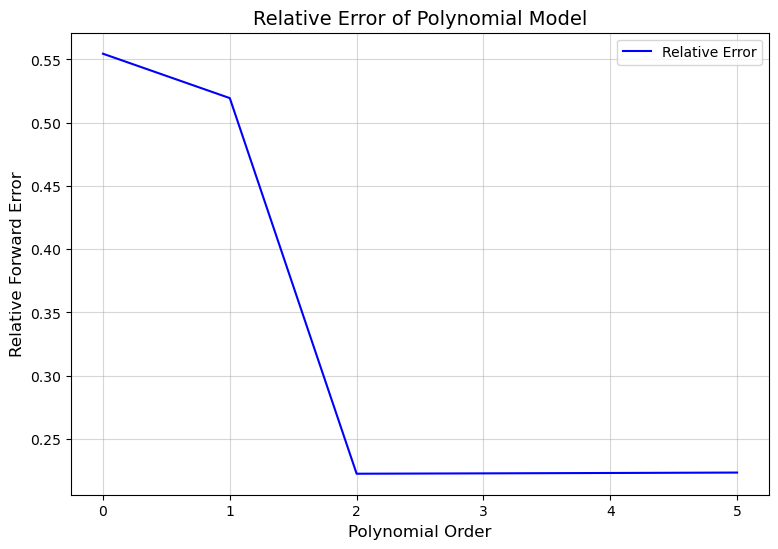

Part iv)


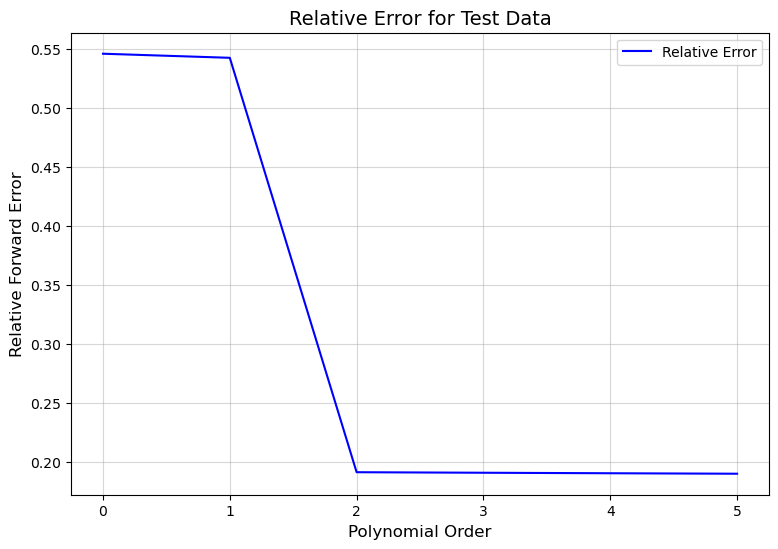

In [2]:
# Libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# 2) c) 
# Getting weather data, pressure, humidity
weatherData = pd.read_csv("WeatherData.csv")
preData = weatherData["Pressure (millibars)"].values
humData = weatherData["Humidity"].values
trainPre, testPre, trainHum, testHum = train_test_split(preData, humData, test_size = 10, shuffle = False)

# Part i) Plotting graph
print("Part i)")
plt.figure(figsize=(9,6))
plt.plot(testPre, testHum, "rx", label = "Test Data")
plt.plot(trainPre, trainHum, "bo", label = "Train Data")

# Graph settings
plt.title("Weather - Humidity vs Pressure", fontsize = 14)
plt.xlabel("Pressure (millibar)", fontsize = 12)
plt.ylabel("Humidity", fontsize = 12)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()

# Part ii) Coeffs for x, Part iii) and iv) Relative forward error
errArr = []
testErr = []
print("Part ii)")
for d in range(6):
    vanMat = Vandermonde(trainPre, d)
    pseudInv = np.linalg.pinv(vanMat)
    coeff = np.matmul(pseudInv, trainHum)
    print("Coefficients of x for d =", d, "is", coeff)
    
    polyFunc = np.polynomial.Polynomial(coeff)
    predHum = polyFunc(preData)
    
    # iii) Relative forward error calculations
    err = humData - predHum
    relErr = np.linalg.norm(err) / np.linalg.norm(humData)
    
    errArr.append(relErr)
    
    # iv) Relative forward error calculations
    predTest = polyFunc(testPre)
    
    error = testHum - predTest
    relError = np.linalg.norm(error) / np.linalg.norm(testHum)
    
    testErr.append(relError)
    
# Part iii) Plotting graph
print("Part iii)")
plt.figure(figsize=(9,6))
plt.plot(range(6), errArr, "b", label = "Relative Error")

# Graph settings
plt.title("Relative Error of Polynomial Model", fontsize = 14)
plt.xlabel("Polynomial Order", fontsize = 12)
plt.ylabel("Relative Forward Error", fontsize = 12)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()

# Part iv) Plotting graph
print("Part iv)")
plt.figure(figsize=(9,6))
plt.plot(range(6), testErr, "b", label = "Relative Error")

# Graph settings
plt.title("Relative Error for Test Data", fontsize = 14)
plt.xlabel("Polynomial Order", fontsize = 12)
plt.ylabel("Relative Forward Error", fontsize = 12)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.show()

#### Part v) 
The optimal order seems to be 2, as seen in the graphs. At order 2, the relative error is already below 0.2 and any further increases to the order doesn't reduce the error by a significant margin.

#### Part vi)

In [3]:
# Part vi) Best estimate
vanMatrix = Vandermonde(trainPre, 2)
pseudoInv = np.linalg.pinv(vanMatrix)
coefficient = np.matmul(pseudoInv, trainHum)
bestPoly = np.polynomial.Polynomial(coefficient)

predictHum = bestPoly(testPre[-5:])
    
print("The best estimates for humidity for the last five days by the best polynomial model is \n", predictHum)

The best estimates for humidity for the last five days by the best polynomial model is 
 [0.1412421  0.61004887 0.14481888 0.31324618 0.18277957]
